# Data Cleaning/EDA

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def run_model(model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)


    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    print(classification_report(y_train, y_hat_train))
    print(classification_report(y_test, y_hat_test))
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 6))

    plot_confusion_matrix(model, X_train, y_train, ax=ax0)
    plot_confusion_matrix(model, X_test, y_test, ax=ax1)

    ax0.title.set_text('Train Confusion Matrix')
    ax1.title.set_text('Test Confusion Matrix')
    
    return model

In [3]:
raw_data = pd.read_csv('shot_logs.csv')
raw_data.tail()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127
128068,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,9,4,0:12,NaN,5,...,5.1,2,made,"Bradley, Avery",202340,2.3,1,2,jarrett jack,101127


In [4]:
df = raw_data.copy()

In [5]:
df.shape

(128069, 21)

In [6]:
df.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [8]:
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [9]:
df['W'].value_counts()

W    64595
L    63474
Name: W, dtype: int64

In [10]:
df['LOCATION'].value_counts()

A    64135
H    63934
Name: LOCATION, dtype: int64

In [11]:
df['SHOT_RESULT'].value_counts()

missed    70164
made      57905
Name: SHOT_RESULT, dtype: int64

In [12]:
df.isna().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

In [13]:
df['SHOT_RESULT'] = df['SHOT_RESULT'].map({'missed': 0, 'made': 1})
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [14]:
df['SHOT_RESULT'] = df['SHOT_RESULT'].astype('int')

In [15]:
df.SHOT_CLOCK = df.SHOT_CLOCK.fillna(value=df.SHOT_CLOCK.median())

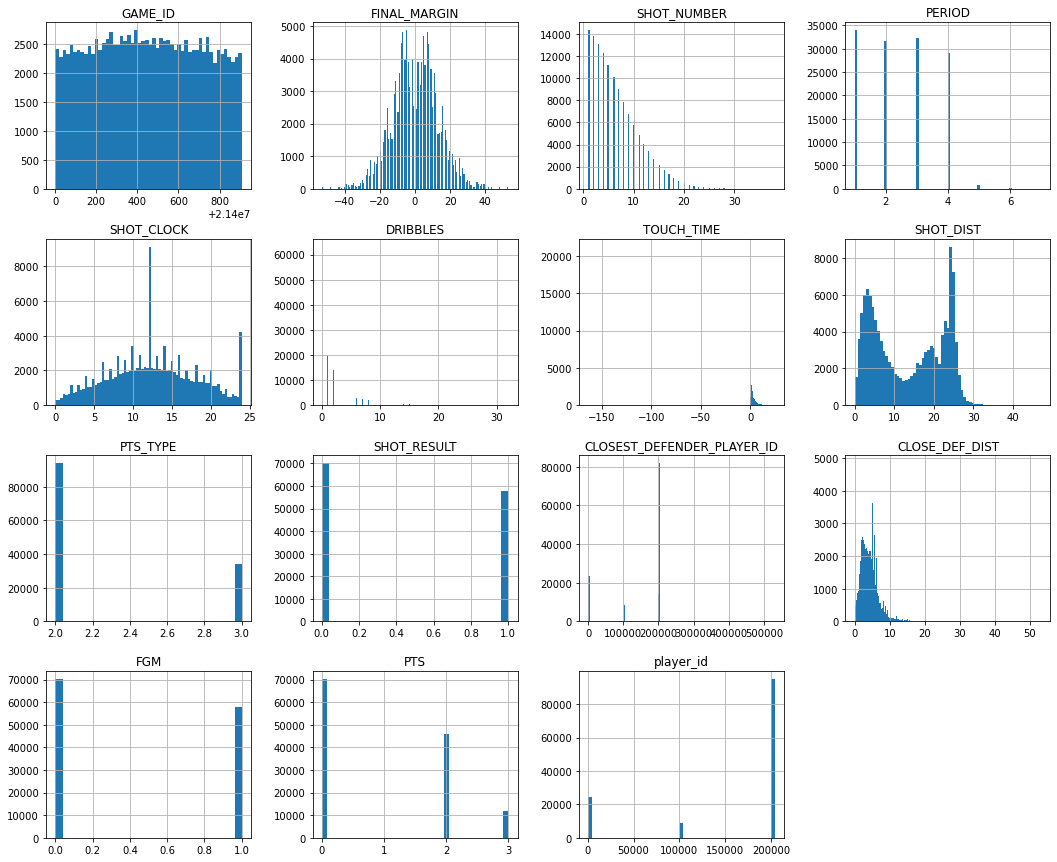

In [16]:
df.hist(figsize=(18,15), bins='auto');

In [17]:
pd.get_dummies(df['LOCATION'], drop_first=True)
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,12.3,3,...,10.1,2,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [18]:
location_dummy = pd.get_dummies(df['LOCATION'], prefix='loc', drop_first=True)
location_dummy

,loc_H
0,0
1,0
2,0
3,0
4,0
...,...
128064,0
128065,0
128066,0
128067,0


In [19]:
df = pd.concat([df, location_dummy], axis=1)
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,loc_H
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,0
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,0
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,12.3,3,...,2,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,0
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,0
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,0


In [20]:
df = df.drop(['LOCATION'], axis=1)
df.head()

,GAME_ID,MATCHUP,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,...,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,loc_H
0,21400899,"MAR 04, 2015 - CHA @ BKN",W,24,1,1,1:09,10.8,2,1.9,...,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,0
1,21400899,"MAR 04, 2015 - CHA @ BKN",W,24,2,1,0:14,3.4,0,0.8,...,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,0
2,21400899,"MAR 04, 2015 - CHA @ BKN",W,24,3,1,0:00,12.3,3,2.7,...,2,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,0
3,21400899,"MAR 04, 2015 - CHA @ BKN",W,24,4,2,11:47,10.3,2,1.9,...,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,0
4,21400899,"MAR 04, 2015 - CHA @ BKN",W,24,5,2,10:34,10.9,2,2.7,...,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,0


In [21]:
df = df.rename(columns={'loc_H': 'LOC: A0/H1'})
df

,GAME_ID,MATCHUP,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,...,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,LOC: A0/H1
0,21400899,"MAR 04, 2015 - CHA @ BKN",W,24,1,1,1:09,10.8,2,1.9,...,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,0
1,21400899,"MAR 04, 2015 - CHA @ BKN",W,24,2,1,0:14,3.4,0,0.8,...,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,0
2,21400899,"MAR 04, 2015 - CHA @ BKN",W,24,3,1,0:00,12.3,3,2.7,...,2,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,0
3,21400899,"MAR 04, 2015 - CHA @ BKN",W,24,4,2,11:47,10.3,2,1.9,...,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,0
4,21400899,"MAR 04, 2015 - CHA @ BKN",W,24,5,2,10:34,10.9,2,2.7,...,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",L,-16,5,3,1:52,18.3,5,6.2,...,2,0,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127,0
128065,21400006,"OCT 29, 2014 - BKN @ BOS",L,-16,6,4,11:28,19.8,4,5.2,...,2,1,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127,0
128066,21400006,"OCT 29, 2014 - BKN @ BOS",L,-16,7,4,11:10,23.0,2,4.2,...,2,1,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127,0
128067,21400006,"OCT 29, 2014 - BKN @ BOS",L,-16,8,4,2:37,9.1,4,4.5,...,2,0,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127,0


In [22]:
df['player_name'].value_counts().head(20)

james harden         1054
mnta ellis           1052
lamarcus aldridge    1050
damian lillard        986
lebron james          978
klay thompson         971
russell westbrook     969
stephen curry         968
kyrie irving          942
tyreke evans          914
nikola vucevic        902
blake griffin         893
chris paul            885
kyle lowry            879
rudy gay              879
john wall             874
gordon hayward        867
anthony davis         841
markieff morris       830
brandon knight        828
Name: player_name, dtype: int64

In [23]:
df = df.drop(['GAME_ID', 'MATCHUP', 'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'PTS', 'FGM','player_id', 'W'],axis=1)
df.head()

,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,player_name,LOC: A0/H1
0,10.8,2,1.9,7.7,2,1,1.3,brian roberts,0
1,3.4,0,0.8,28.2,3,0,6.1,brian roberts,0
2,12.3,3,2.7,10.1,2,0,0.9,brian roberts,0
3,10.3,2,1.9,17.2,2,0,3.4,brian roberts,0
4,10.9,2,2.7,3.7,2,0,1.1,brian roberts,0


In [24]:
top_players = ['james harden', 'mnta ellis', 'lamarcus aldridge', 'damian lillard', 'lebron james', 'klay thompson', 'russell westbrook', 'stephen curry', 'kyrie irving', 'tyreke evans', 'nikola vucevic', 'blake griffin', 'chris paul', 'rudy gay', 'kyle lowry', 'john wall', 'gordon hayward', 'anthony davis', 'markieff morris', 'brandon knight']
df = df.loc[df.player_name.isin(top_players)]

In [25]:
df.head()

,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,player_name,LOC: A0/H1
4610,14.0,0,0.9,24.3,3,1,6.3,gordon hayward,0
4611,3.4,1,3.1,22.2,3,0,0.1,gordon hayward,0
4612,4.9,1,2.5,13.2,2,0,4.0,gordon hayward,0
4613,3.8,0,1.0,24.6,3,0,2.4,gordon hayward,0
4614,8.3,2,5.0,16.5,2,0,3.8,gordon hayward,0


In [26]:
pd.get_dummies(df['player_name'])
df.head()

,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,player_name,LOC: A0/H1
4610,14.0,0,0.9,24.3,3,1,6.3,gordon hayward,0
4611,3.4,1,3.1,22.2,3,0,0.1,gordon hayward,0
4612,4.9,1,2.5,13.2,2,0,4.0,gordon hayward,0
4613,3.8,0,1.0,24.6,3,0,2.4,gordon hayward,0
4614,8.3,2,5.0,16.5,2,0,3.8,gordon hayward,0


In [27]:
player_dummies = pd.get_dummies(df['player_name'], prefix='player')
player_dummies

,player_anthony davis,player_blake griffin,player_brandon knight,player_chris paul,player_damian lillard,player_gordon hayward,player_james harden,player_john wall,player_klay thompson,player_kyle lowry,player_kyrie irving,player_lamarcus aldridge,player_lebron james,player_markieff morris,player_mnta ellis,player_nikola vucevic,player_rudy gay,player_russell westbrook,player_stephen curry,player_tyreke evans
4610,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4611,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4612,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4613,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4614,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119487,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119488,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119489,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119490,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
df = pd.concat([df, player_dummies], axis=1)
df.head()

,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,player_name,LOC: A0/H1,player_anthony davis,...,player_kyrie irving,player_lamarcus aldridge,player_lebron james,player_markieff morris,player_mnta ellis,player_nikola vucevic,player_rudy gay,player_russell westbrook,player_stephen curry,player_tyreke evans
4610,14.0,0,0.9,24.3,3,1,6.3,gordon hayward,0,0,...,0,0,0,0,0,0,0,0,0,0
4611,3.4,1,3.1,22.2,3,0,0.1,gordon hayward,0,0,...,0,0,0,0,0,0,0,0,0,0
4612,4.9,1,2.5,13.2,2,0,4.0,gordon hayward,0,0,...,0,0,0,0,0,0,0,0,0,0
4613,3.8,0,1.0,24.6,3,0,2.4,gordon hayward,0,0,...,0,0,0,0,0,0,0,0,0,0
4614,8.3,2,5.0,16.5,2,0,3.8,gordon hayward,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df = df.drop(['player_name'], axis=1)
df

,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,LOC: A0/H1,player_anthony davis,player_blake griffin,...,player_kyrie irving,player_lamarcus aldridge,player_lebron james,player_markieff morris,player_mnta ellis,player_nikola vucevic,player_rudy gay,player_russell westbrook,player_stephen curry,player_tyreke evans
4610,14.0,0,0.9,24.3,3,1,6.3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4611,3.4,1,3.1,22.2,3,0,0.1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4612,4.9,1,2.5,13.2,2,0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4613,3.8,0,1.0,24.6,3,0,2.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4614,8.3,2,5.0,16.5,2,0,3.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119487,12.9,0,0.8,25.0,3,0,5.9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
119488,10.0,5,4.2,6.0,2,1,3.8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
119489,12.3,1,2.0,27.9,3,1,3.7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
119490,11.4,2,1.7,8.7,2,0,2.6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df = df.rename(columns={'player_lebron james': 'player_lebron_james', 'player_stephen curry': 'player_stephen_curry', 'player_chris paul': 'player_chris_paul', 'player_anthony davis': 'player_anthony_davis', 'player_nikola vucevic': 'player_nikola_vucevic', 'player_blake griffin': 'player_blake_griffin' })
df

,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,LOC: A0/H1,player_anthony_davis,player_blake_griffin,...,player_kyrie irving,player_lamarcus aldridge,player_lebron_james,player_markieff morris,player_mnta ellis,player_nikola_vucevic,player_rudy gay,player_russell westbrook,player_stephen_curry,player_tyreke evans
4610,14.0,0,0.9,24.3,3,1,6.3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4611,3.4,1,3.1,22.2,3,0,0.1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4612,4.9,1,2.5,13.2,2,0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4613,3.8,0,1.0,24.6,3,0,2.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4614,8.3,2,5.0,16.5,2,0,3.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119487,12.9,0,0.8,25.0,3,0,5.9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
119488,10.0,5,4.2,6.0,2,1,3.8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
119489,12.3,1,2.0,27.9,3,1,3.7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
119490,11.4,2,1.7,8.7,2,0,2.6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X = df.drop('SHOT_RESULT', axis=1)
y = df[['SHOT_RESULT']]
y.head()

,SHOT_RESULT
4610,1
4611,0
4612,0
4613,0
4614,0


# Logistic Regression

              precision    recall  f1-score   support

           0       0.61      0.69      0.65      7936
           1       0.58      0.49      0.53      6913

    accuracy                           0.60     14849
   macro avg       0.59      0.59      0.59     14849
weighted avg       0.59      0.60      0.59     14849

              precision    recall  f1-score   support

           0       0.61      0.67      0.64      2037
           1       0.55      0.49      0.52      1676

    accuracy                           0.59      3713
   macro avg       0.58      0.58      0.58      3713
weighted avg       0.59      0.59      0.59      3713



/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

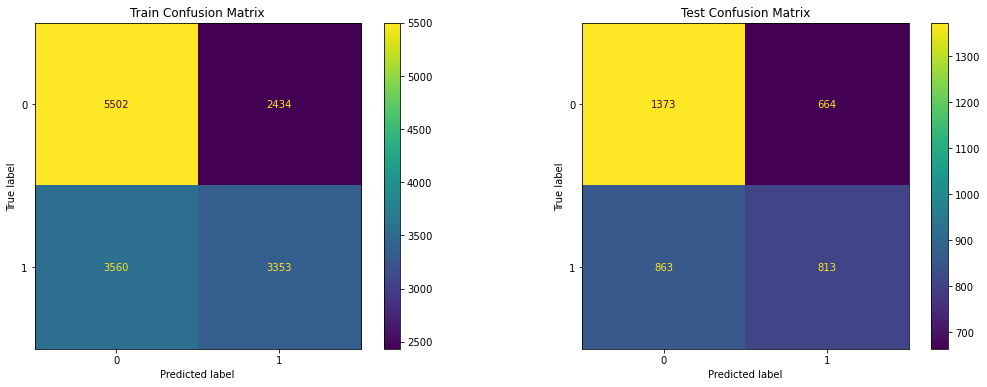

In [32]:
log_model = LogisticRegression()

run_model(log_model, X, y)

# K-Nearest Neighbors

<ipython-input-2-f0c45ee75151>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.73      0.76      0.74      7936
           1       0.71      0.67      0.69      6913

    accuracy                           0.72     14849
   macro avg       0.72      0.72      0.72     14849
weighted avg       0.72      0.72      0.72     14849

              precision    recall  f1-score   support

           0       0.58      0.60      0.59      2037
           1       0.50      0.48      0.49      1676

    accuracy                           0.55      3713
   macro avg       0.54      0.54      0.54      3713
weighted avg       0.54      0.55      0.55      3713



KNeighborsClassifier()

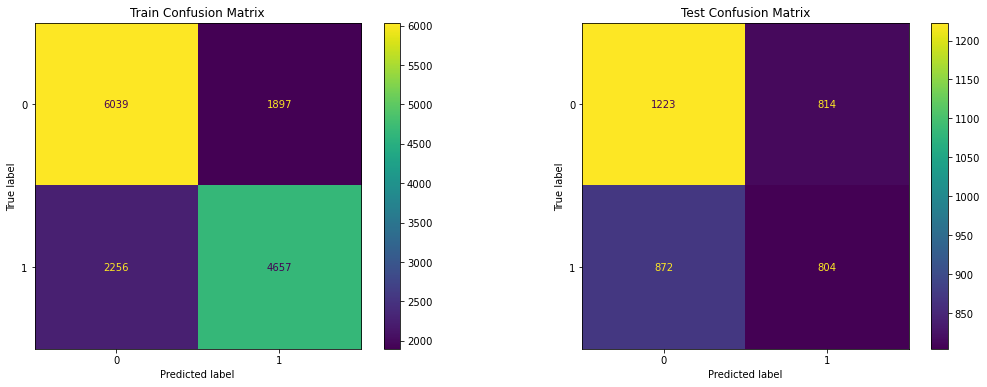

In [33]:
KNN_model = KNeighborsClassifier()

run_model(KNN_model, X, y)

# Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7936
           1       1.00      1.00      1.00      6913

    accuracy                           1.00     14849
   macro avg       1.00      1.00      1.00     14849
weighted avg       1.00      1.00      1.00     14849

              precision    recall  f1-score   support

           0       0.58      0.55      0.57      2037
           1       0.49      0.52      0.50      1676

    accuracy                           0.54      3713
   macro avg       0.54      0.54      0.54      3713
weighted avg       0.54      0.54      0.54      3713



DecisionTreeClassifier()

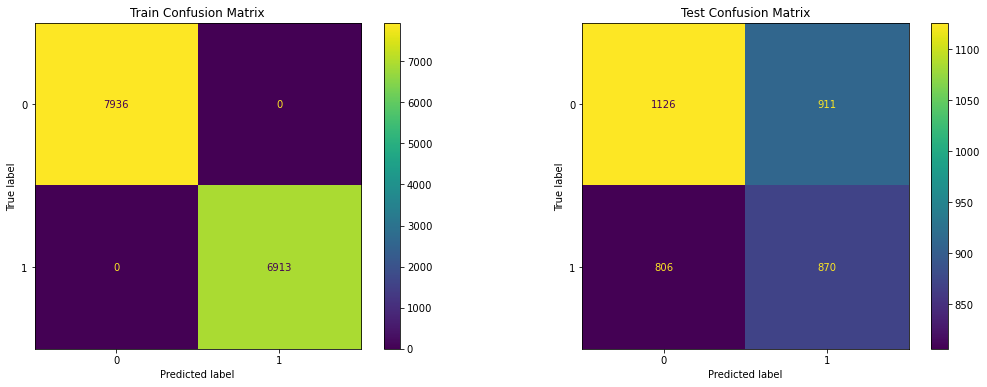

In [34]:
Dtree_model = DecisionTreeClassifier()

run_model(Dtree_model, X, y)

# Bagging Tree

/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7936
           1       0.99      0.96      0.98      6913

    accuracy                           0.98     14849
   macro avg       0.98      0.98      0.98     14849
weighted avg       0.98      0.98      0.98     14849

              precision    recall  f1-score   support

           0       0.59      0.70      0.64      2037
           1       0.53      0.41      0.46      1676

    accuracy                           0.57      3713
   macro avg       0.56      0.56      0.55      3713
weighted avg       0.57      0.57      0.56      3713



BaggingClassifier()

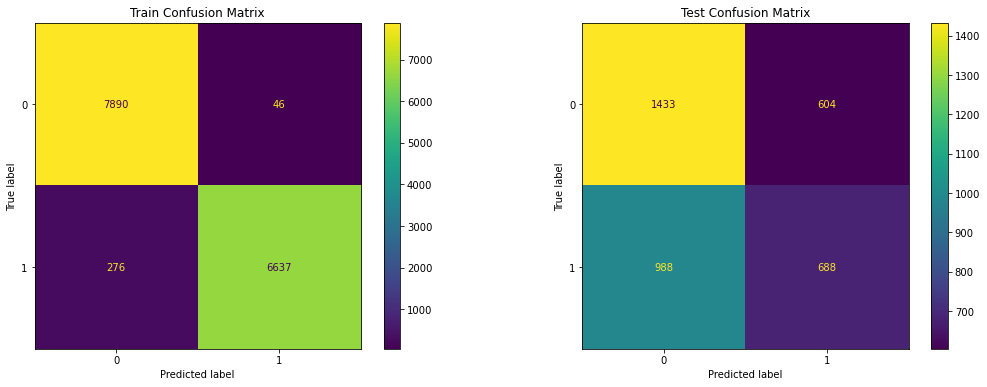

In [35]:
Btree_model = BaggingClassifier()

run_model(Btree_model, X, y)

# Random Forest

<ipython-input-2-f0c45ee75151>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7936
           1       1.00      1.00      1.00      6913

    accuracy                           1.00     14849
   macro avg       1.00      1.00      1.00     14849
weighted avg       1.00      1.00      1.00     14849

              precision    recall  f1-score   support

           0       0.60      0.68      0.63      2037
           1       0.53      0.45      0.48      1676

    accuracy                           0.57      3713
   macro avg       0.56      0.56      0.56      3713
weighted avg       0.57      0.57      0.57      3713



RandomForestClassifier()

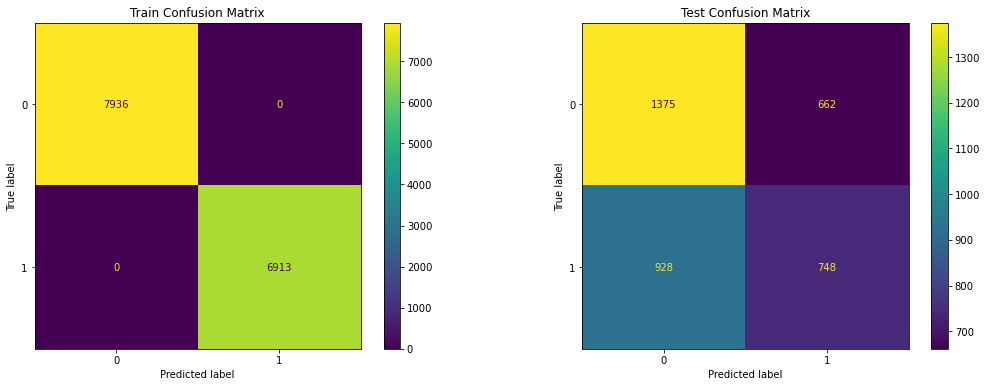

In [36]:
RForest_model = RandomForestClassifier()

run_model(RForest_model, X, y)

# XGBoost

/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.76      0.87      0.81      7936
           1       0.83      0.68      0.75      6913

    accuracy                           0.79     14849
   macro avg       0.79      0.78      0.78     14849
weighted avg       0.79      0.79      0.78     14849

              precision    recall  f1-score   support

           0       0.60      0.69      0.64      2037
           1       0.54      0.44      0.48      1676

    accuracy                           0.58      3713
   macro avg       0.57      0.57      0.56      3713
weighted avg       0.57      0.58      0.57      3713



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

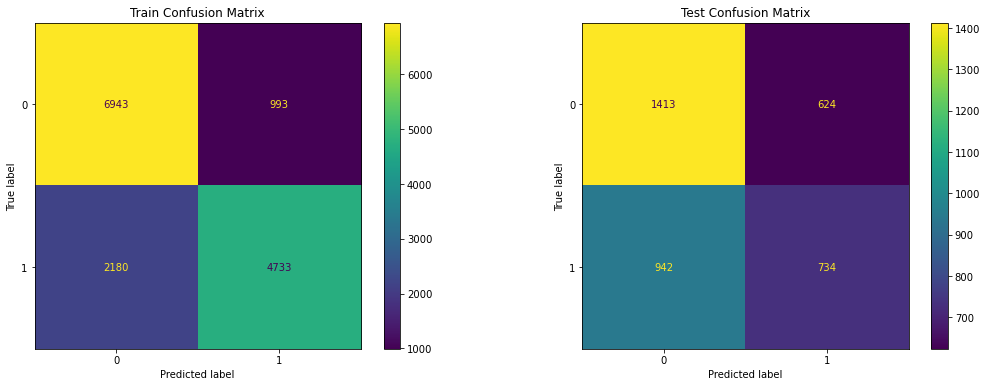

In [37]:
XGBoost_model = XGBClassifier()

run_model(XGBoost_model, X, y)

# Feature Importances

In [38]:
def feat_impt(model):
    
    

    fi = sorted(list(zip(model.feature_importances_, X.columns)))
    fi = pd.DataFrame(fi, columns=['impt', 'name'])
    
    plt.figure(figsize=(15, 10))
    plt.barh(fi.name, fi.impt)
    plt.title('Feature Importances');

    return model

DecisionTreeClassifier()

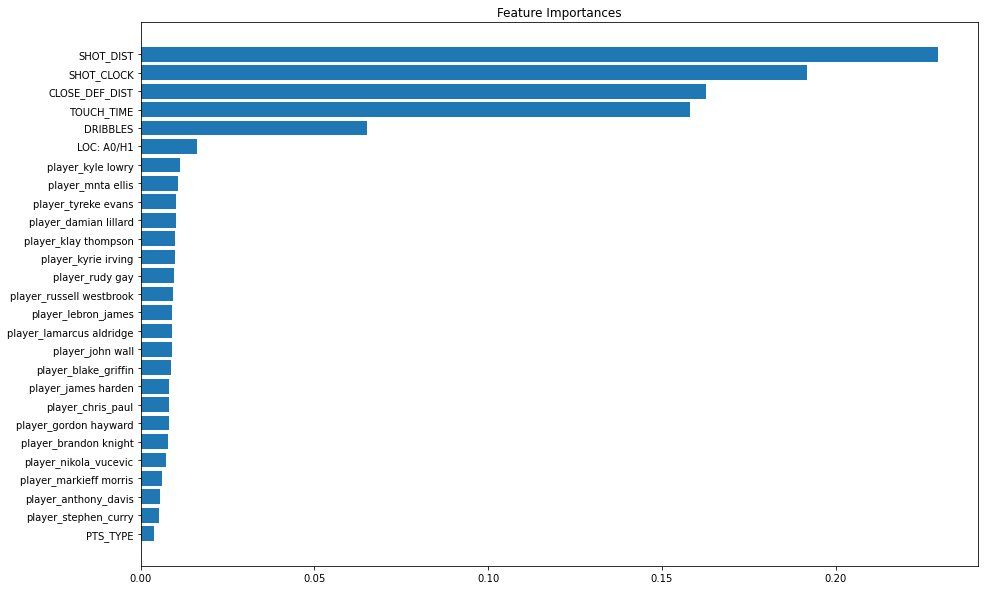

In [39]:
feat_impt(Dtree_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

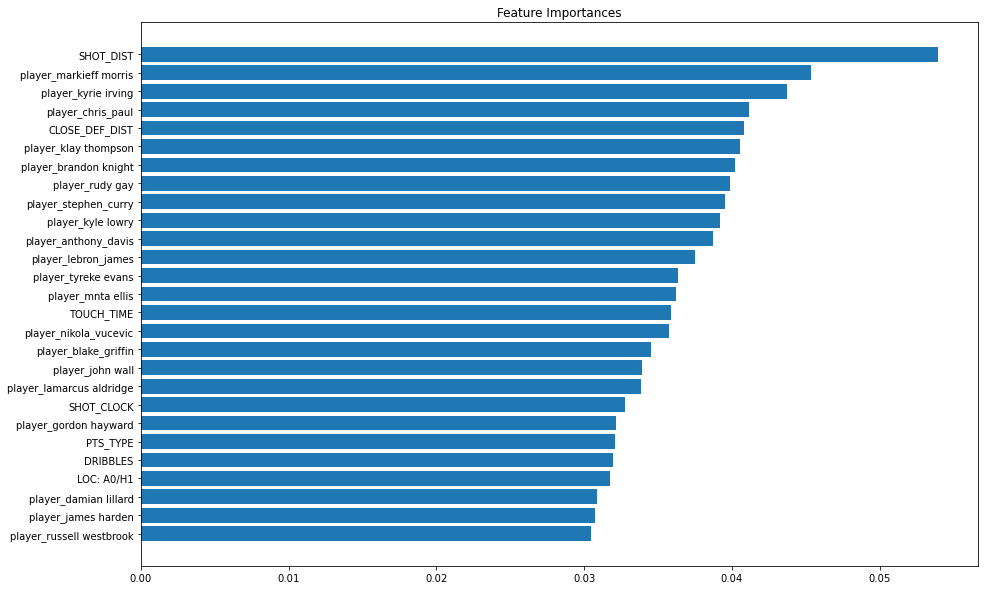

In [40]:
feat_impt(XGBoost_model)

# Hyperparameter Tuning using GridSearch

## Decision Tree

In [41]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [42]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 648 different permutations.


In [43]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(Dtree_model, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [44]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X, y)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")


Mean Training Score: 65.19%
Mean Test Score: 61.18%
Best Parameter Combination Found During Grid Search:


## XGBoost

In [45]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [46]:
grid_clf = GridSearchCV(XGBoost_model, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X, y)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X)
test_preds = grid_clf.predict(X)
training_accuracy = accuracy_score(y, training_preds)
test_accuracy = accuracy_score(y, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 3
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 62.8%
Validation accuracy: 62.8%


In [47]:
param_grid2 = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [48]:
grid_clf2 = GridSearchCV(XGBoost_model, param_grid2, scoring='accuracy', cv=None, n_jobs=1)
grid_clf2.fit(X, y)

best_parameters = grid_clf2.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf2.predict(X)
test_preds = grid_clf2.predict(X)
training_accuracy = accuracy_score(y, training_preds)
test_accuracy = accuracy_score(y, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

/Users/mohamedhassan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 68.95%
Validation accuracy: 68.95%


# Final Model

Based on the results from hyperparameter tuning of my initial Decision Tree and XG Boost models, I chose XG Boost as my final model. Below are the final model results and its feature importances:

              precision    recall  f1-score   support

           0       0.67      0.86      0.75      7936
           1       0.76      0.53      0.62      6913

    accuracy                           0.70     14849
   macro avg       0.72      0.69      0.69     14849
weighted avg       0.72      0.70      0.69     14849

              precision    recall  f1-score   support

           0       0.60      0.76      0.67      2037
           1       0.57      0.40      0.47      1676

    accuracy                           0.59      3713
   macro avg       0.59      0.58      0.57      3713
weighted avg       0.59      0.59      0.58      3713



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

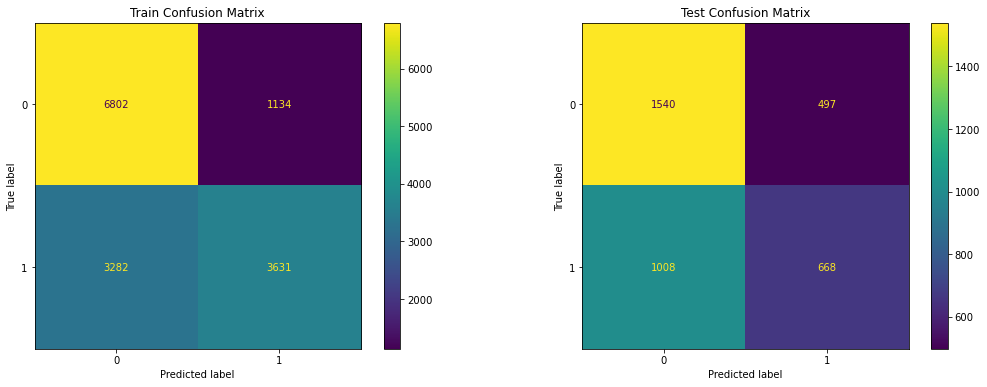

In [49]:
XGFinal_model = XGBClassifier(learning_rate = 0.1,
max_depth = 6,
min_child_weight = 1,
n_estimators = 100,
subsample = 0.7)

run_model(XGFinal_model, X, y)

My final model has a training accuracy rate of 68.95%, while its testing accuracy rate is 59%. The feature importances of the model indicates that shot distance will best determine the outcome of a shot:     

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

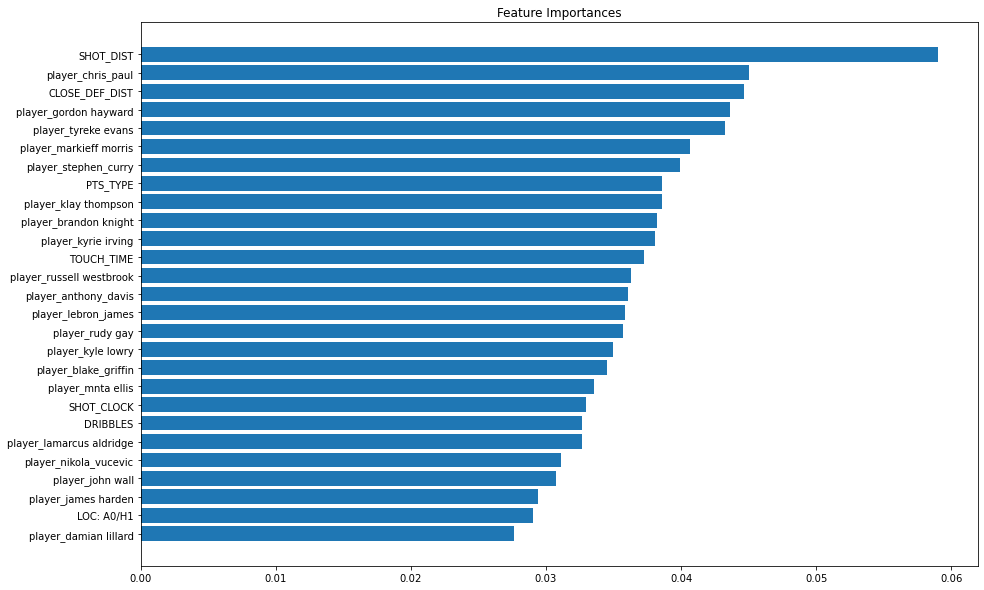

In [50]:
feat_impt(XGFinal_model)

# Exploring Shot Distance Feature

I decided to explore the relationship between shot result and shot distance as a whole, and then with individual players that had the highest percentages of made shots:

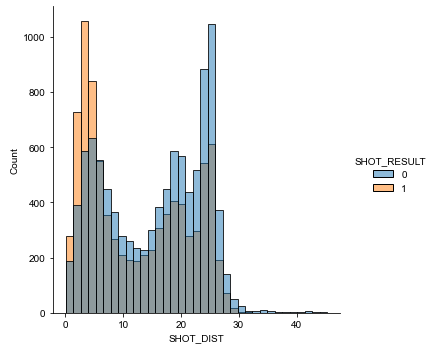

In [51]:
sns.displot(data=df, x='SHOT_DIST', hue='SHOT_RESULT', fill=True);
sns.set_style("white")

In [52]:
raw_data.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [53]:
shot_percentages = []
for name in df.columns:
    if 'player' in name:
        print(name)
        print(df.loc[df[name] == 1].SHOT_RESULT.value_counts(normalize=True))
        shot_percentages.append(df.loc[df[name] == 1].SHOT_RESULT.value_counts(normalize=True))

player_anthony_davis
1    0.543401
0    0.456599
Name: SHOT_RESULT, dtype: float64
player_blake_griffin
1    0.50056
0    0.49944
Name: SHOT_RESULT, dtype: float64
player_brandon knight
0    0.571256
1    0.428744
Name: SHOT_RESULT, dtype: float64
player_chris_paul
0    0.519774
1    0.480226
Name: SHOT_RESULT, dtype: float64
player_damian lillard
0    0.567951
1    0.432049
Name: SHOT_RESULT, dtype: float64
player_gordon hayward
0    0.551326
1    0.448674
Name: SHOT_RESULT, dtype: float64
player_james harden
0    0.550285
1    0.449715
Name: SHOT_RESULT, dtype: float64
player_john wall
0    0.551487
1    0.448513
Name: SHOT_RESULT, dtype: float64
player_klay thompson
0    0.53759
1    0.46241
Name: SHOT_RESULT, dtype: float64
player_kyle lowry
0    0.585893
1    0.414107
Name: SHOT_RESULT, dtype: float64
player_kyrie irving
0    0.53397
1    0.46603
Name: SHOT_RESULT, dtype: float64
player_lamarcus aldridge
0    0.549524
1    0.450476
Name: SHOT_RESULT, dtype: float64
player_lebron_j

In [54]:
pd.concat(shot_percentages)

1    0.543401
0    0.456599
1    0.500560
0    0.499440
0    0.571256
1    0.428744
0    0.519774
1    0.480226
0    0.567951
1    0.432049
0    0.551326
1    0.448674
0    0.550285
1    0.449715
0    0.551487
1    0.448513
0    0.537590
1    0.462410
0    0.585893
1    0.414107
0    0.533970
1    0.466030
0    0.549524
1    0.450476
0    0.511247
1    0.488753
0    0.532530
1    0.467470
0    0.550380
1    0.449620
1    0.532151
0    0.467849
0    0.554039
1    0.445961
0    0.564499
1    0.435501
0    0.514463
1    0.485537
0    0.566740
1    0.433260
Name: SHOT_RESULT, dtype: float64

In [55]:
shot_percentages

[1    0.543401
 0    0.456599
 Name: SHOT_RESULT, dtype: float64,
 1    0.50056
 0    0.49944
 Name: SHOT_RESULT, dtype: float64,
 0    0.571256
 1    0.428744
 Name: SHOT_RESULT, dtype: float64,
 0    0.519774
 1    0.480226
 Name: SHOT_RESULT, dtype: float64,
 0    0.567951
 1    0.432049
 Name: SHOT_RESULT, dtype: float64,
 0    0.551326
 1    0.448674
 Name: SHOT_RESULT, dtype: float64,
 0    0.550285
 1    0.449715
 Name: SHOT_RESULT, dtype: float64,
 0    0.551487
 1    0.448513
 Name: SHOT_RESULT, dtype: float64,
 0    0.53759
 1    0.46241
 Name: SHOT_RESULT, dtype: float64,
 0    0.585893
 1    0.414107
 Name: SHOT_RESULT, dtype: float64,
 0    0.53397
 1    0.46603
 Name: SHOT_RESULT, dtype: float64,
 0    0.549524
 1    0.450476
 Name: SHOT_RESULT, dtype: float64,
 0    0.511247
 1    0.488753
 Name: SHOT_RESULT, dtype: float64,
 0    0.53253
 1    0.46747
 Name: SHOT_RESULT, dtype: float64,
 0    0.55038
 1    0.44962
 Name: SHOT_RESULT, dtype: float64,
 1    0.532151
 0   

In [56]:
df_player_pct = pd.DataFrame(shot_percentages)
df_player_pct.head()

,0,1
SHOT_RESULT,0.456599,0.543401
SHOT_RESULT,0.499440,0.500560
SHOT_RESULT,0.571256,0.428744
SHOT_RESULT,0.519774,0.480226
SHOT_RESULT,0.567951,0.432049


In [57]:
df.columns

Index(['SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE',
       'SHOT_RESULT', 'CLOSE_DEF_DIST', 'LOC: A0/H1', 'player_anthony_davis',
       'player_blake_griffin', 'player_brandon knight', 'player_chris_paul',
       'player_damian lillard', 'player_gordon hayward', 'player_james harden',
       'player_john wall', 'player_klay thompson', 'player_kyle lowry',
       'player_kyrie irving', 'player_lamarcus aldridge',
       'player_lebron_james', 'player_markieff morris', 'player_mnta ellis',
       'player_nikola_vucevic', 'player_rudy gay', 'player_russell westbrook',
       'player_stephen_curry', 'player_tyreke evans'],
      dtype='object')

In [58]:
df_player_pct['player'] = df.columns[8:]
df_player_pct.head()

,0,1,player
SHOT_RESULT,0.456599,0.543401,player_anthony_davis
SHOT_RESULT,0.499440,0.500560,player_blake_griffin
SHOT_RESULT,0.571256,0.428744,player_brandon knight
SHOT_RESULT,0.519774,0.480226,player_chris_paul
SHOT_RESULT,0.567951,0.432049,player_damian lillard


In [59]:
df_player_pct.columns = ['missed', 'made', 'player']
df_player_pct.head()

,missed,made,player
SHOT_RESULT,0.456599,0.543401,player_anthony_davis
SHOT_RESULT,0.499440,0.500560,player_blake_griffin
SHOT_RESULT,0.571256,0.428744,player_brandon knight
SHOT_RESULT,0.519774,0.480226,player_chris_paul
SHOT_RESULT,0.567951,0.432049,player_damian lillard


In [60]:
df_player_pct = pd.DataFrame(df_player_pct.set_index('player').stack())
df_player_pct.head()

0
player                                
player_anthony_davis  missed  0.456599
                      made    0.543401
player_blake_griffin  missed  0.499440
                      made    0.500560
player_brandon knight missed  0.571256

In [61]:
df_player_pct = df_player_pct.reset_index()
df_player_pct

,player,level_1,0
0,player_anthony_davis,missed,0.456599
1,player_anthony_davis,made,0.543401
2,player_blake_griffin,missed,0.499440
3,player_blake_griffin,made,0.500560
4,player_brandon knight,missed,0.571256
5,player_brandon knight,made,0.428744
6,player_chris_paul,missed,0.519774
7,player_chris_paul,made,0.480226
8,player_damian lillard,missed,0.567951
9,player_damian lillard,made,0.432049


In [62]:
df_player_pct.columns=['player', 'SHOT_RESULT', 'shot_percentage']

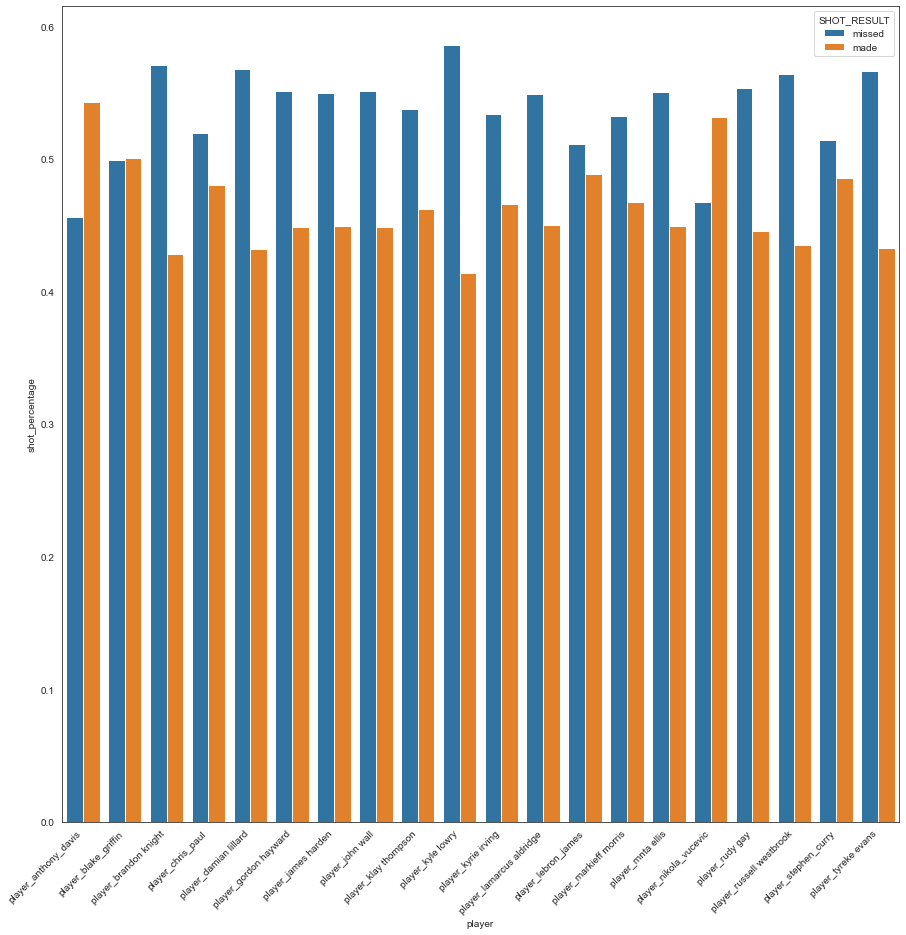

In [63]:
fig,ax = plt.subplots(figsize=(15,15))
sns.barplot(x = 'player', y = 'shot_percentage', hue = 'SHOT_RESULT', data=df_player_pct)
plt.xticks(rotation=45)
# plt.tick_params(axis='x', pad=30)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right');

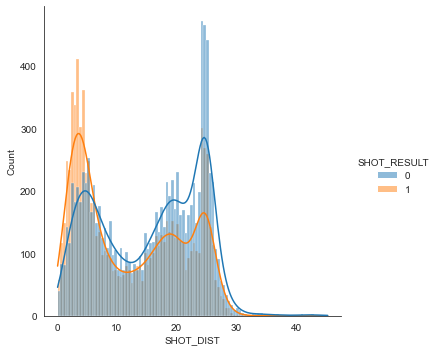

In [64]:
sns.displot(data= df, x=df['SHOT_DIST'], kde=True, color='blue', hue='SHOT_RESULT', bins=100);

## Chris Paul

No handles with labels found to put in legend.


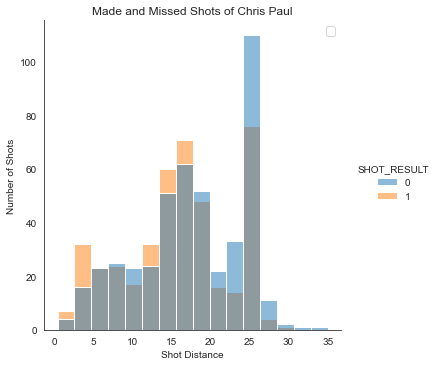

In [65]:
df1=df[df.player_chris_paul == 1]
sns.displot(data=df1, x='SHOT_DIST',  kde=False, hue='SHOT_RESULT')


# sns.displot(df['SHOT_DIST'],  kde=False, label='Miss')


plt.legend(prop={'size': 12})
plt.title('Made and Missed Shots of Chris Paul')
plt.xlabel('Shot Distance')
plt.ylabel('Number of Shots');

## Stephen Curry

No handles with labels found to put in legend.


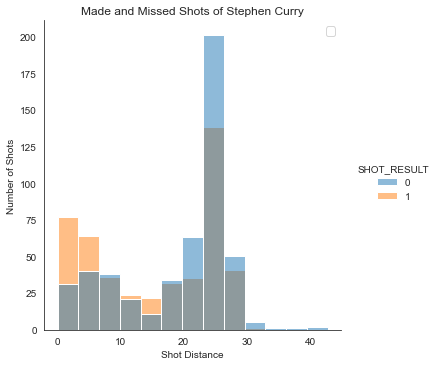

In [66]:
df1=df[df.player_stephen_curry == 1]
sns.displot(data=df1, x='SHOT_DIST',  kde=False, hue='SHOT_RESULT')


# sns.displot(df['SHOT_DIST'],  kde=False, label='Miss')


plt.legend(prop={'size': 12})
plt.title('Made and Missed Shots of Stephen Curry')
plt.xlabel('Shot Distance')
plt.ylabel('Number of Shots');

## Lebron James

No handles with labels found to put in legend.


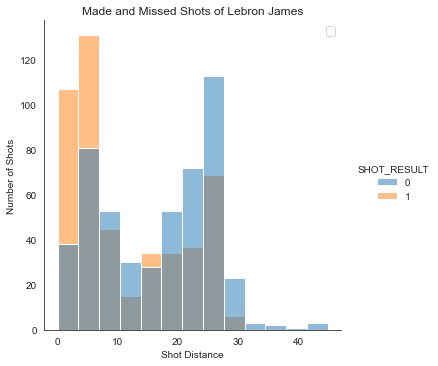

In [67]:
df1=df[df.player_lebron_james == 1]
sns.displot(data=df1, x='SHOT_DIST',  kde=False, hue='SHOT_RESULT')


# sns.displot(df['SHOT_DIST'],  kde=False, label='Miss')


plt.legend(prop={'size': 12})
plt.title('Made and Missed Shots of Lebron James')
plt.xlabel('Shot Distance')
plt.ylabel('Number of Shots');

## Anthony Davis

No handles with labels found to put in legend.


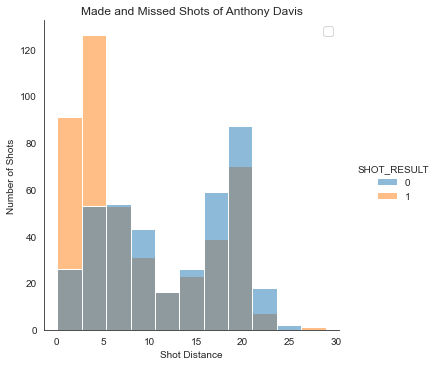

In [68]:
df1=df[df.player_anthony_davis == 1]
sns.displot(data=df1, x='SHOT_DIST',  kde=False, hue='SHOT_RESULT')


# sns.displot(df['SHOT_DIST'],  kde=False, label='Miss')


plt.legend(prop={'size': 12})
plt.title('Made and Missed Shots of Anthony Davis')
plt.xlabel('Shot Distance')
plt.ylabel('Number of Shots');

## Nikola Vucevic

No handles with labels found to put in legend.


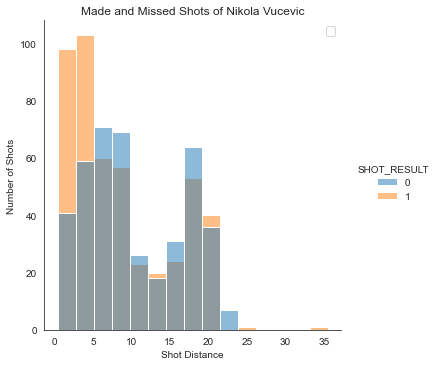

In [69]:
df1=df[df.player_nikola_vucevic == 1]
sns.displot(data=df1, x='SHOT_DIST',  kde=False, hue='SHOT_RESULT')


# sns.displot(df['SHOT_DIST'],  kde=False, label='Miss')


plt.legend(prop={'size': 12})
plt.title('Made and Missed Shots of Nikola Vucevic')
plt.xlabel('Shot Distance')
plt.ylabel('Number of Shots');

## Blake Griffin

No handles with labels found to put in legend.


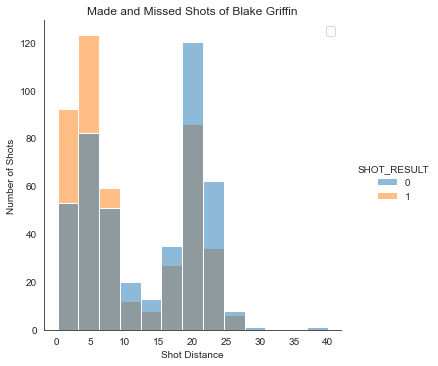

In [70]:
df1=df[df.player_blake_griffin == 1]
sns.displot(data=df1, x='SHOT_DIST',  kde=False, hue='SHOT_RESULT')


# sns.displot(df['SHOT_DIST'],  kde=False, label='Miss')


plt.legend(prop={'size': 12})
plt.title('Made and Missed Shots of Blake Griffin')
plt.xlabel('Shot Distance')
plt.ylabel('Number of Shots');

When analyizing the overall shot distance and shot results, and the highest percentages of made shots for the individual players, there is a connection between made shots and the distance of the shots. The shorter the shot distance of the shot attempts, the higher the frequency of made shots there is. The longer the distance, the higher the frequency of missed shots there is.